##How has unemployment during the period of the pandemic 2019 - 2023 affected the crime rates in Chicago
### By: Saahi Arumilli

In [1]:
# Installation of necessary packages
%pip install seaborn

In [2]:
# Import necessary packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import nltk
import sklearn
import scipy
from scipy import stats
import string
import re # helps you filter urls
from IPython.display import display, Latex, Markdown

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Mounting to google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Navigate to google drive folder
%cd "/content/drive/MyDrive/Data Science Project"
!pwd

/content/drive/MyDrive/Data Science Project
/content/drive/MyDrive/Data Science Project


In [5]:
## TOPIC: Unemployments affects on the Crime rate in Chicago between 2001 - present

# Read Files
unemploy = pd.read_csv('Unemployment_Chicago_MetroArea2001-2024.csv') # Modified data file from the Bureau of Labor Statistics
crime2019 = pd.read_csv('Chicago_Crime_2019.csv')
crime2020 = pd.read_csv('Chicago_Crime_2020.csv')
crime2021 = pd.read_csv('Chicago_Crime_2021.csv')
crime2022 = pd.read_csv('Chicago_Crime_2022.csv')
crime2023 = pd.read_csv('Chicago_Crime_2023.csv')

In [6]:
unemploy.head()

,Year,Period,labor force,employment,unemployment,unemployment rate
0,2001,Jan,4747976,4489265,258711,5.4
1,2001,Feb,4775219,4513765,261454,5.5
2,2001,Mar,4793678,4522183,271495,5.7
3,2001,Apr,4773991,4513569,260422,5.5
4,2001,May,4774864,4533211,241653,5.1


In [7]:
pandemic = unemploy[(unemploy['Year'] == 2019) | (unemploy['Year'] == 2020) | (unemploy['Year'] == 2021) | (unemploy['Year'] == 2022) | (unemploy['Year'] == 2023)]
# heroes[(heroes['first_season']==3) & (heroes['first_seen_on']=='a')]
pandemic = pandemic.reset_index(drop=False)
pandemic.head() # Refined dataframe with only the years in consideration

,index,Year,Period,labor force,employment,unemployment,unemployment rate
0,216,2019,Jan,4957296,4708703,248593,5.0
1,217,2019,Feb,4965773,4738842,226931,4.6
2,218,2019,Mar,4973021,4754754,218267,4.4
3,219,2019,Apr,4940983,4751724,189259,3.8
4,220,2019,May,4914020,4740800,173220,3.5


In [8]:
# Create a new Frame that has the average unemployment rate for each year
avg = pandemic.groupby('Year')['unemployment rate'].mean()
avg.to_frame()


,unemployment rate
Year,
2019,3.875000
2020,9.683333
2021,6.216667
2022,4.550000
2023,4.333333


In [9]:
crime2020.head()

# take only the date and primary type of crime from each of the years
Crime2019 = crime2019.loc[:, ['Date', 'Primary Type']]
Crime2020 = crime2020.loc[:, ['Date', 'Primary Type']]
Crime2021 = crime2021.loc[:, ['Date', 'Primary Type']]
Crime2022 = crime2022.loc[:, ['Date', 'Primary Type']]
Crime2023 = crime2023.loc[:, ['Date', 'Primary Type']]

# Change the full time stamp to only the year in which the crime took place
Crime2019['Date'] = pd.DatetimeIndex(Crime2019['Date']).year
Crime2020['Date'] = pd.DatetimeIndex(Crime2020['Date']).year
Crime2021['Date'] = pd.DatetimeIndex(Crime2021['Date']).year
Crime2022['Date'] = pd.DatetimeIndex(Crime2022['Date']).year
Crime2023['Date'] = pd.DatetimeIndex(Crime2023['Date']).year


        Year - 2019                Primary Type  Year - 2020  Year - 2021  \
0            2019.0                     ROBBERY          NaN          NaN   
1            2019.0  OFFENSE INVOLVING CHILDREN          NaN          NaN   
2            2019.0                       THEFT          NaN          NaN   
3            2019.0                       THEFT          NaN          NaN   
4            2019.0                       THEFT          NaN          NaN   
...             ...                         ...          ...          ...   
262075          NaN          DECEPTIVE PRACTICE          NaN          NaN   
262076          NaN                     ROBBERY          NaN          NaN   
262077          NaN         MOTOR VEHICLE THEFT          NaN          NaN   
262078          NaN             CRIMINAL DAMAGE          NaN          NaN   
262079          NaN             CRIMINAL DAMAGE          NaN          NaN   

        Year - 2022  Year - 2023  
0               NaN          NaN  
1    

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


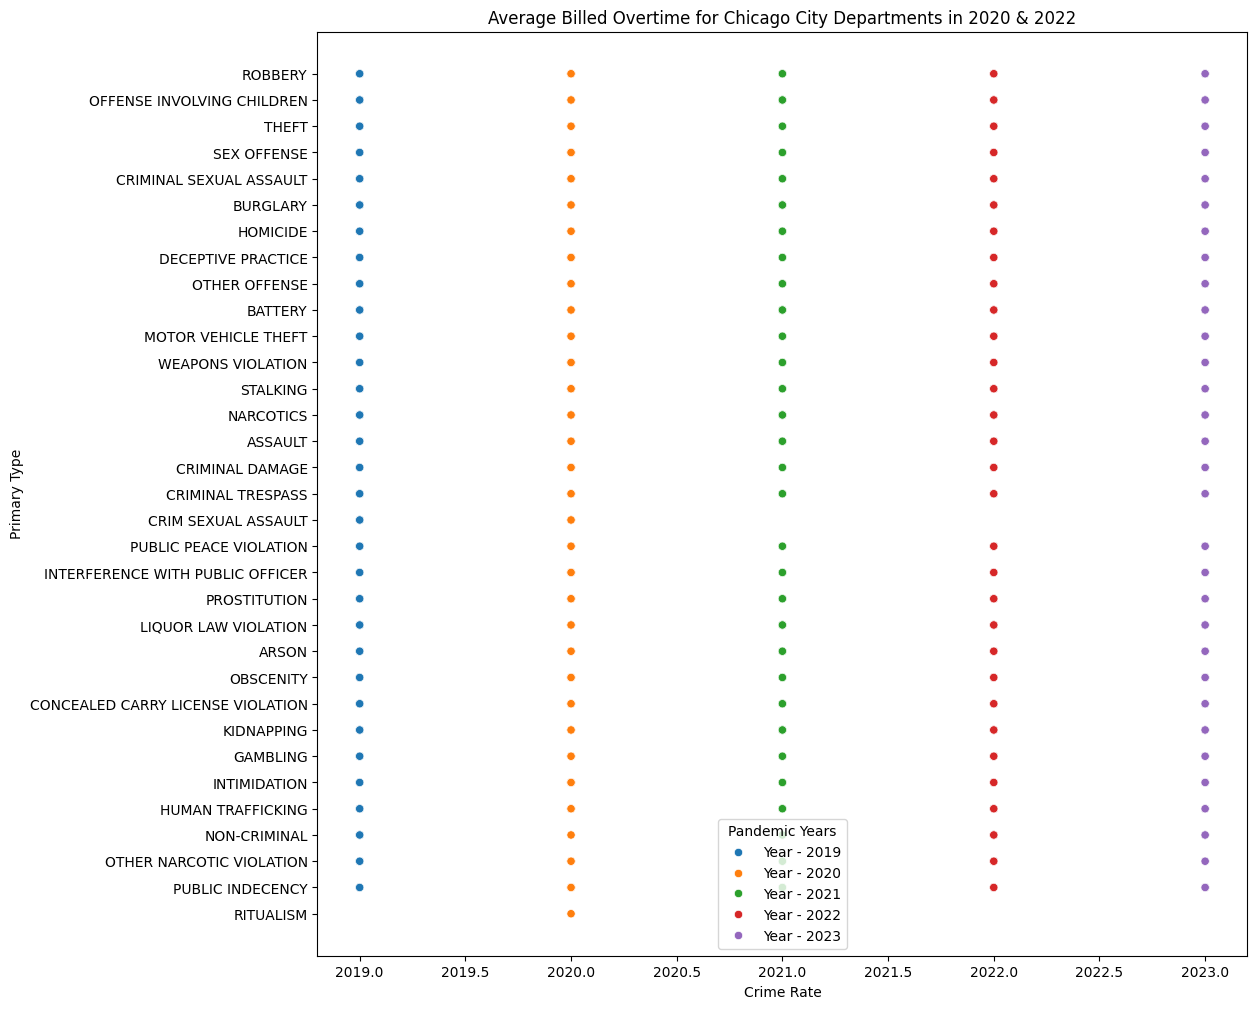

In [13]:

plt.figure(figsize=(12, 12))

Crime2019.rename(columns={'Date': 'Year - 2019'}, inplace=True)
Crime2020.rename(columns={'Date': 'Year - 2020'}, inplace=True)
Crime2021.rename(columns={'Date': 'Year - 2021'}, inplace=True)
Crime2022.rename(columns={'Date': 'Year - 2022'}, inplace=True)
Crime2023.rename(columns={'Date': 'Year - 2023'}, inplace=True)


yearsFrame = [Crime2019, Crime2020, Crime2021, Crime2022, Crime2023]
# otFrame = [over2020_data, over2022_data]

resultFrame = pd.concat(yearsFrame)
print(resultFrame)
# resultFrame = pd.concat(otFrame)
resultFrame.head()

resultFrame.columns

# Melt the data
melted_data = pd.melt(resultFrame, id_vars=['Primary Type'], value_vars=['Year - 2019', 'Year - 2020', 'Year - 2021', 'Year - 2022', 'Year - 2023'], var_name='Pandemic Years', value_name='Crime Rate')


#sns.barplot(x='DEPARTMENT NAME', y='Average Overtime', hue='Overtime Year' , data=melted_data)
sns.scatterplot(x='Crime Rate', y='Primary Type', hue='Pandemic Years' , data=melted_data)

plt.title("Average Billed Overtime for Chicago City Departments in 2020 & 2022")
plt.show()

In [12]:
# Data Frame containing the years in the study along with total number of crimes committed during that year
data = {
    'Year': [2019, 2020, 2021, 2022, 2023],
    'Total': [len(Crime2019), len(Crime2020), len(Crime2021), len(Crime2022), len(Crime2023)]}

totalCrimesPerYear = pd.DataFrame(data=data, index=[0,1,2,3,4], columns=['Year', 'Total'])
totalCrimesPerYear.head()
# d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}

,Year,Total
0,2019,261476
1,2020,212427
2,2021,209242
3,2022,239421
4,2023,262080


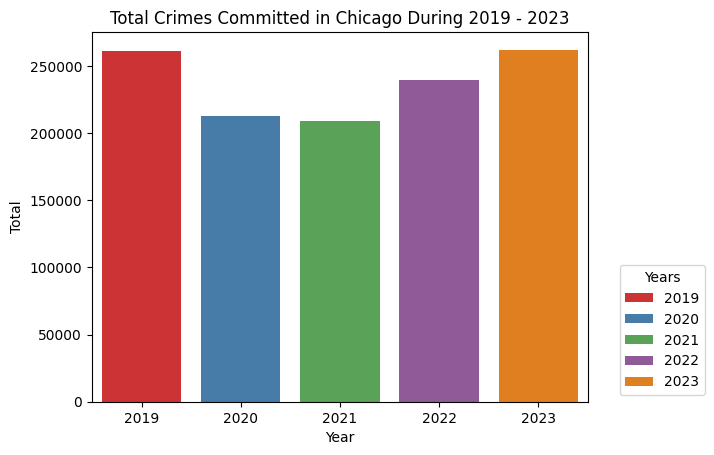

In [14]:

sns.barplot(x='Year', y='Total', hue='Year' , data=totalCrimesPerYear, palette='Set1')
plt.title('Total Crimes Committed in Chicago During 2019 - 2023')
plt.legend(loc = 'lower right', bbox_to_anchor=[1.25, 0.0], title='Years')


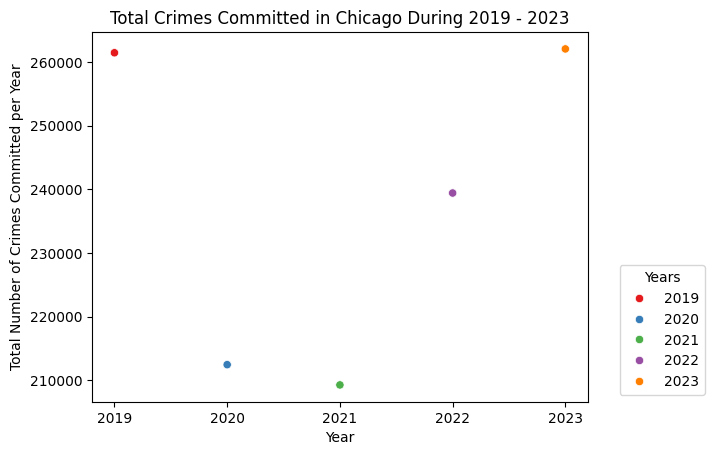

In [15]:
# Scatter plot showing total crimes committed per year
scatterPlot = sns.scatterplot(x='Year', y='Total', hue='Year' , data=totalCrimesPerYear, palette='Set1')
scatterPlot.set_xticks([2019, 2020, 2021, 2022, 2023])
scatterPlot.set_ylabel('Total Number of Crimes Committed per Year')
plt.title('Total Crimes Committed in Chicago During 2019 - 2023')
plt.legend(loc = 'lower right', bbox_to_anchor=[1.25, 0.0], title='Years')
plt.show()

In [16]:
# These frames hold the key data
# totalCrimesPerYear
# avg

# This frame contains both the unemployment rate for the period of investigation (2019 - 2023) and the total crimes committed for each year
crimeAndUnemploy = pd.merge(totalCrimesPerYear, avg, on="Year")
crimeAndUnemploy['unemployment rate'] = crimeAndUnemploy['unemployment rate'].round(1)
crimeAndUnemploy.head()






,Year,Total,unemployment rate
0,2019,261476,3.9
1,2020,212427,9.7
2,2021,209242,6.2
3,2022,239421,4.6
4,2023,262080,4.3


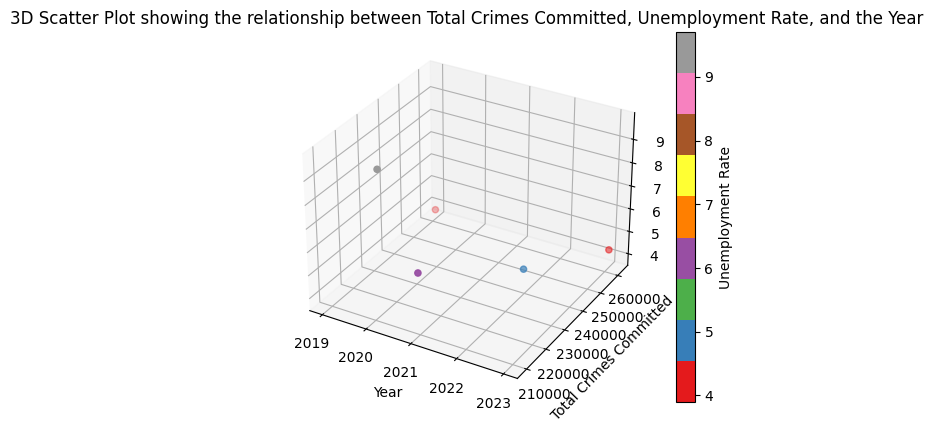

In [17]:
# sns.scatterplot(data=crimeAndUnemploy, x='Total', y='unemployment rate')
x = crimeAndUnemploy['Year']
y = crimeAndUnemploy['Total']
z = crimeAndUnemploy['unemployment rate']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='Set1')
ax.set_ylabel('Total Crimes Committed')
ax.set_xlabel('Year')
ax.set_zlabel('Unemployment Rate')
ax.set_title('3D Scatter Plot showing the relationship between Total Crimes Committed, Unemployment Rate, and the Year')
plt.colorbar(ax.collections[0], label='Unemployment Rate')
plt.show()

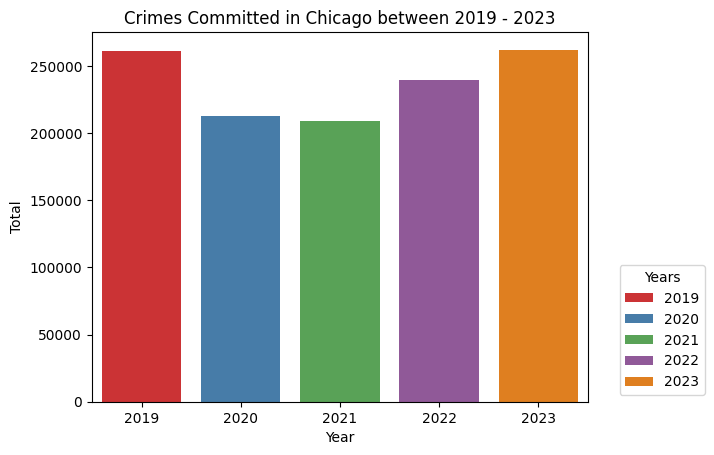

In [18]:
crimeBars = sns.barplot(y='Total', x='Year', hue='Year' , data=crimeAndUnemploy, palette='Set1')
crimeBars.set_title('Crimes Committed in Chicago between 2019 - 2023')
plt.legend(loc = 'lower right', bbox_to_anchor=[1.25, 0.0], title='Years')
plt.show()

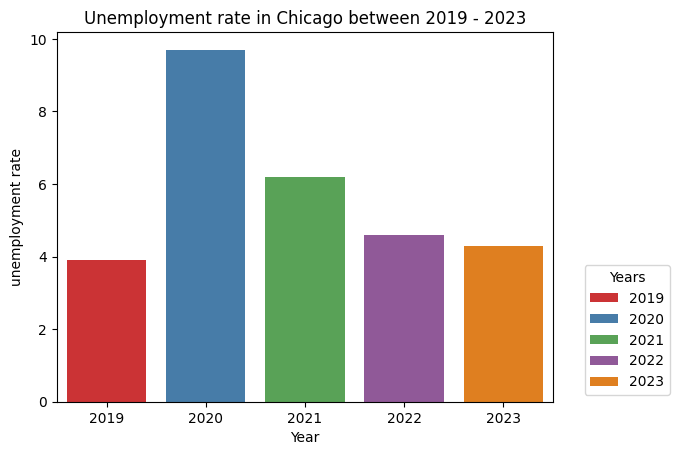

In [19]:
unemployBars = sns.barplot(y='unemployment rate', x='Year', hue='Year' , data=crimeAndUnemploy, palette='Set1')
unemployBars.set_title('Unemployment rate in Chicago between 2019 - 2023')
plt.legend(loc = 'lower right', bbox_to_anchor=[1.25, 0.0], title='Years')
plt.show()

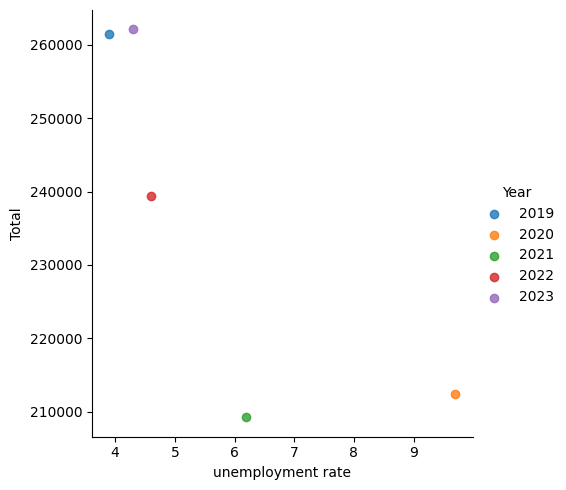

In [20]:
sns.lmplot(data=crimeAndUnemploy, y='Total', x='unemployment rate', hue='Year')

# Analysis of the Data

In [23]:
# Calculate Pearson correlation coefficient
corr_coeff = crimeAndUnemploy['unemployment rate'].corr(crimeAndUnemploy['Total'])
print(f"Pearson correlation coefficient: {corr_coeff}")

Pearson correlation coefficient: -0.7980831365449826


### According to the correlation coefficient as one factor increases the other decreases and thus we can say during the time of the pandemic as unemployment rose the crime rate declined.

### One factor that might have attributed to the negative pearson correlation coefficient is the lockdown placed in Chicago during the pandemic. This could have resulted in a lower crime rate thus affecting our data.